In [139]:
### Importing the python builtin libraries for analysis
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [140]:
df=pd.read_csv("C:/Users/Venu/Downloads/data.csv")

In [141]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [142]:
df.tail()

,x1,x2,y
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0
2226,109.624009,1.000000e+08,0


In [143]:
df.shape

(2227, 3)

In [144]:
df.describe(include='all')

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [145]:
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [146]:
df[df['x1'].isnull()]

,x1,x2,y
36,NaN,116.138522,1
98,NaN,36.905402,1
268,NaN,-116.385719,1
1084,NaN,34.714328,0
1318,NaN,53.182191,0


In [147]:
df[df['x2'].isnull()]

,x1,x2,y
44,-99.627522,NaN,1
1092,55.162258,NaN,0
1430,-74.126054,NaN,0


In [148]:
df.isnull().sum().mean()

2.6666666666666665

In [156]:
df.drop([36, 98, 268,1084,1318], inplace = True)

In [159]:
df.drop([44,1092,1430], inplace = True)

In [160]:
df.shape

(2219, 3)

In [161]:
df.groupby(['x1'])['x2'].mean()

x1
-134.369160   -132.747233
-134.366669     90.000000
-133.886833   -106.726874
-133.793105    108.817909
-133.315092     82.398042
                  ...    
 132.119978    123.386723
 133.003601    130.768805
 133.790176     71.994044
 134.177960     96.040508
 134.508687    -94.171141
Name: x2, Length: 1884, dtype: float64

### Now visualize the data for better understanding the given problem

In [162]:
x = ('x1','x2')
y = ('y')

Text(0.5, 1.0, 'X vs y label data')

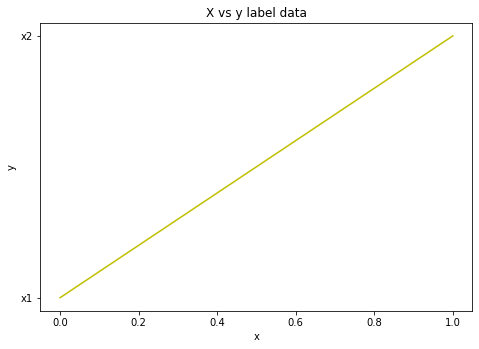

In [163]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x,y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('X vs y label data')

#### ** Creating a figure object and put two axes on it, ax1 and ax2. Located at [0,0,1,1] and [0.2,0.5,.2,.2] respectively.**

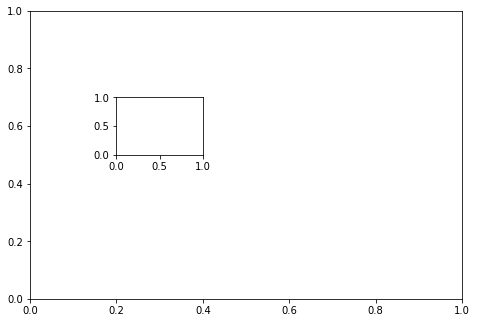

In [164]:
fig = plt.figure()

ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.2,0.5,.2,.2])



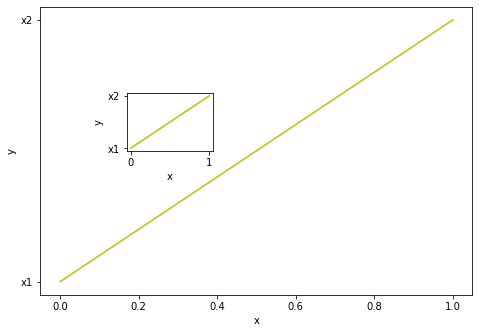

In [165]:
### Now plot (x,y) on both axes. And call your figure object to show it.
ax1.plot(x,y)
ax1.set_xlabel('x')
ax1.set_ylabel('y')


ax2.plot(x,y)
ax2.set_xlabel('x')
ax2.set_ylabel('y')

fig

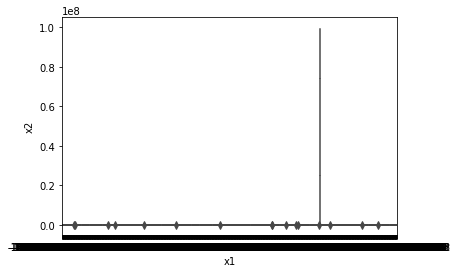

In [301]:
## checking the boxplot for checking outliers in the data

sns.boxplot(x='x1',y='x2',data=df,palette='rainbow')

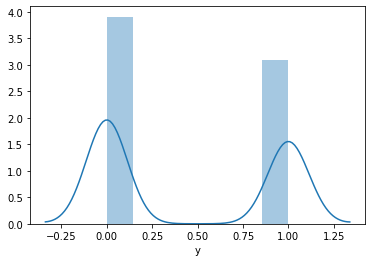

In [166]:
## creating the distribution plot to check the data 
sns.distplot(df['y'])

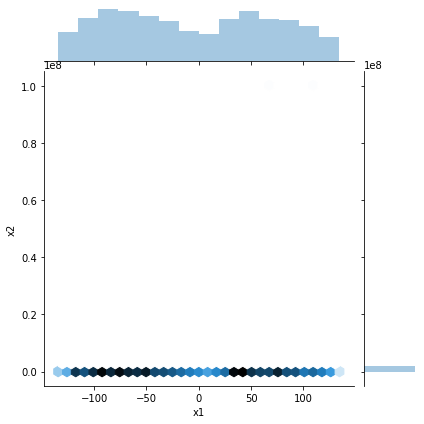

In [167]:
sns.jointplot(x='x1',y='x2',data=df,kind='hex')

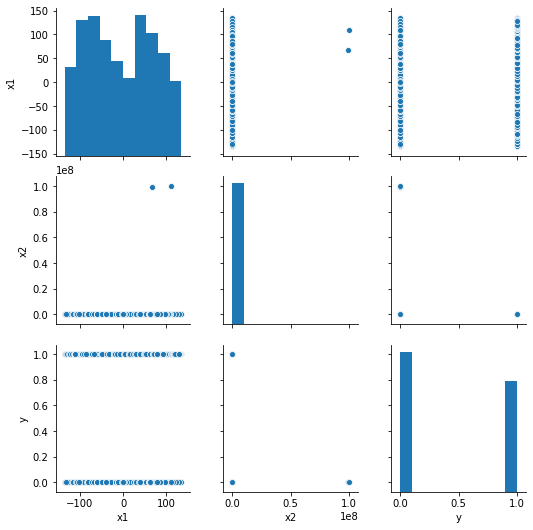

In [168]:
sns.pairplot(df)

In [173]:
## We have seen the data values how they are in structure by using the visualization technique

## now lets split the data into to x and y varaibles

X = df[['x1','x2']].values
y = df['y'].values

In [174]:
X

array([[-1.19366669e+02,  1.15000000e+02],
       [-1.01108044e+02,  9.77771586e+01],
       [-1.30278658e+02,  1.06767654e+02],
       ...,
       [ 8.56739404e+01,  1.03839270e+02],
       [ 7.89588622e+01,  7.86053707e+01],
       [ 1.09624009e+02,  9.99999990e+07]])

In [175]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [176]:
## Now lets split the data into train and test set for evaulating the model performancce

from sklearn.model_selection import train_test_split

In [177]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [178]:
X_train

array([[  41.9183269 ,   27.55433087],
       [ 104.4925008 ,   90.0854194 ],
       [ -39.73815544,   31.62522837],
       ...,
       [ -51.3666687 ,   47.        ],
       [ -69.84595003,   19.76554388],
       [ -86.3666687 , -113.        ]])

In [179]:
X_test

array([[ 17.18573704,  22.10907017],
       [-80.77147176,  63.14543083],
       [ 89.57180854,  93.69013656],
       ...,
       [-44.41608452, -87.84188569],
       [ 95.6333313 ,  99.        ],
       [118.1602884 , 124.2102906 ]])

In [180]:
## performing the Standardization technique to for better performance model

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train
X_test=sc.transform(X_test)

In [181]:
X_train

array([[ 0.64488109, -0.02536938],
       [ 1.49428986, -0.02534473],
       [-0.46355915, -0.02536777],
       ...,
       [-0.62140959, -0.02536171],
       [-0.87225531, -0.02537245],
       [-1.09651466, -0.02542479]])

In [182]:
X_test

array([[ 0.30915027, -0.02537153],
       [-1.02056305, -0.02535535],
       [ 1.29174996, -0.02534331],
       ...,
       [-0.52705937, -0.02541487],
       [ 1.37403168, -0.02534121],
       [ 1.67982229, -0.02533128]])

### Until now we have did some preprocessing steps to look on the data behaviour 
### Now we have to built the model on the Training data 

In [296]:
## importing the KNN algorithm to check the model performance

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [297]:
y_pred=classifier.predict(X_test)

In [298]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,

In [299]:
## applying the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[244, 134],
       [159, 129]], dtype=int64)

In [300]:
## importing Metrics module to check Accuracy and precision,recall

from sklearn import metrics
print("Accuracy=",metrics.accuracy_score(y_test,y_pred))
print("Precision=",metrics.precision_score(y_test,y_pred))
print("Recall=",metrics.recall_score(y_test,y_pred))

Accuracy= 0.56006006006006
Precision= 0.49049429657794674
Recall= 0.4479166666666667


In [188]:
## performing Gradient Boosting algorithm to improve the model performance

from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier(learning_rate=0.01,random_state=0)
GB.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [189]:
## Calculating the Accuracy score for Gradient boosting algorithm

GB.score(X_test,y_test)

0.9324324324324325

In [190]:
## performing Logistic Regression to check for better accuracy compare to Gradient Boosting

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train,y_train)

C:\Users\Venu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [191]:
predictions=logisticRegr.predict(X_test)
predictions

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,

In [193]:
## Checking the Logistic Regression Accuracy

score=logisticRegr.score(X_test,y_test)
score

0.6066066066066066

In [264]:
## Performing the Random forest classifier 

from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(n_jobs=2,random_state=0)
rfc.fit(X_train,y_train)

C:\Users\Venu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [265]:
y_pred=rfc.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,

In [266]:
print("Accuracy=",metrics.accuracy_score(y_test,y_pred))
print("Precision=",metrics.precision_score(y_test,y_pred))
print("Recall=",metrics.recall_score(y_test,y_pred))

Accuracy= 0.9474474474474475
Precision= 0.9347079037800687
Recall= 0.9444444444444444


In [198]:
## importing the Support Vector machine algorithm to improve the model

from sklearn.svm import SVC
model= SVC(kernel='linear')

In [199]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [200]:
model.score(X_test,y_test)

0.5675675675675675

In [205]:
from sklearn.svm import SVC
model= SVC(kernel='rbf')

In [206]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [207]:
model.score(X_test,y_test)

0.6126126126126126

In [242]:
### implementing DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
DTC= DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=10,min_samples_leaf=12)
DTC.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [243]:
y_pred_en= DTC.predict(X_test)

In [244]:
y_pred_en

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,

In [245]:
print("Accuracy=",metrics.accuracy_score(y_test, y_pred_en))
print("Precision=",metrics.precision_score(y_test,y_pred_en))
print("Recall=",metrics.recall_score(y_test,y_pred_en))

Accuracy= 0.9459459459459459
Precision= 0.9405594405594405
Recall= 0.9340277777777778


## The overall obervation of model across all algorithms

C:\Users\Venu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Venu\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Venu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Venu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Venu\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.",

LR: 0.541598 (0.194142)
LDA: 0.306043 (0.299321)
KNN: 0.925610 (0.046048)
CART: 0.916597 (0.046274)
NB: 0.442795 (0.470623)


C:\Users\Venu\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Venu\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Venu\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Venu\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

SVM: 0.464229 (0.237717)


C:\Users\Venu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Venu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Venu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Venu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Venu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

RF: 0.914796 (0.056326)
GB: 0.917504 (0.044219)


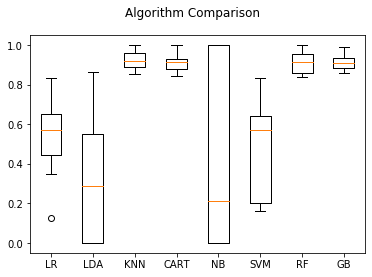

In [309]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
X = df[['x1','x2']]
y = df['y']
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### As per the above observations across all model performance we can see that the Gradient boosting algorithm and Random forest algorithms did well to give the accuracy around 95% 